In [39]:
import imblearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
import statsmodels.api as sm

In [4]:
churnData=pd.read_csv('Customer-Churn.csv')
churnData.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


In [26]:
churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [25]:
churnData["TotalCharges"] = pd.to_numeric(churnData["TotalCharges"], errors='coerce')

In [27]:
churnData.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

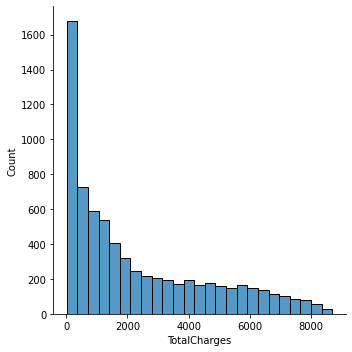

In [30]:
churnData["TotalCharges"].value_counts(dropna=False)
sns.displot(churnData[churnData["TotalCharges"].isna()==False]["TotalCharges"])
plt.show()
churnData["TotalCharges"] =churnData["TotalCharges"].fillna(np.ceil(np.mean(churnData["TotalCharges"])))

In [32]:
churn_predict = churnData[["Churn","tenure","SeniorCitizen","MonthlyCharges", "TotalCharges"]]
churn_predict = churn_predict.rename(columns={"tenure":"Tenure"})
churn_predict

,Churn,Tenure,SeniorCitizen,MonthlyCharges,TotalCharges
0,No,1,0,29.85,29.85
1,No,34,0,56.95,1889.50
2,Yes,2,0,53.85,108.15
3,No,45,0,42.30,1840.75
4,Yes,2,0,70.70,151.65
...,...,...,...,...,...
7038,No,24,0,84.80,1990.50
7039,No,72,0,103.20,7362.90
7040,No,11,0,29.60,346.45
7041,Yes,4,1,74.40,306.60


In [33]:
churn_predict['Churn'] = churn_predict['Churn'].replace(["No"], 0)
churn_predict['Churn'] = churn_predict['Churn'].replace(["Yes"], 1)
churn_predict['Churn'].dtypes

dtype('int64')

In [34]:
X = churn_predict.drop('Churn',axis = 1)
y = churn_predict['Churn'] 

Standardization of independent variables

In [36]:
transformer = StandardScaler().fit(X)
X_scaled = pd.DataFrame(transformer.transform(X),columns=X.columns)
X_scaled.head()

,Tenure,SeniorCitizen,MonthlyCharges,TotalCharges
0,-1.277445,-0.439916,-1.160323,-0.994972
1,0.066327,-0.439916,-0.259629,-0.173876
2,-1.236724,-0.439916,-0.362660,-0.960400
3,0.514251,-0.439916,-0.746535,-0.195401
4,-1.236724,-0.439916,0.197365,-0.941193


logistc regression

In [37]:
LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_scaled, y)

logits = np.log(1/LR.predict_proba(X_scaled)[:,1]-1)

In [40]:
X_added_constant = sm.add_constant(X)
model = sm.OLS(y,X_added_constant).fit()
model.summary()

/usr/local/Cellar/jupyterlab/3.0.16_1/libexec/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Churn   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     533.1
Date:                Wed, 22 Sep 2021   Prob (F-statistic):               0.00
Time:                        11:49:25   Log-Likelihood:                -3303.9
No. Observations:                7043   AIC:                             6618.
Df Residuals:                    7038   BIC:                             6652.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0704      0.018      3.992      0.000       0.036       0.105
Tenure            -0.0028      0.000     -6.161      0.000      -0.004      -0.002
SeniorCitizen      0.1095      0.013      8.520      0.000       0.084       0.135
MonthlyCharges     0.0067      0.000     24.375      0.000       0.006       0.007
TotalCharges   -7.418e-05   6.21e-06    -11.954      0.000   -8.63e-05    -6.2e-05
==============================================================================
Omnibus:                      514.169   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              580.637
Skew:                           0.676   Prob(JB):                    8.25e-127
Kurtosis:                       2.615   Cond. No.                     1.23e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Build the model

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=0)

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train, y_train)
LR.score(X_test, y_test)

0.7830777967064169

In [44]:
pred = LR.predict(X_test)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

confusion_matrix(y_test,pred)

precision:  0.6180758017492711
recall:  0.45788336933045354
f1:  0.5260545905707196


array([[1167,  131],
       [ 251,  212]])

### IMBALACE DATA

In [45]:
# I think because we have so different data in No, the model is not right, we really need to balance the data

In [42]:
churn_predict['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [51]:
train = pd.concat([X_train, y_train],axis=1)
train.head()
no_churn = train[train['Churn']==0]
yes_churn = train[train['Churn']==1]

In [61]:
# I applied in my train data the balance data, so I can see that dowsampling give me a best score and best confusion matrix.
# I will do the balane data with the data first and the scale then again in the end

##### DOWNSAMPLING

In [62]:
no_churn_undersampled = resample(no_churn, 
                                    replace=False, 
                                    n_samples = len(yes_churn),
                                    random_state=0)

display(yes_churn.shape)
display(no_churn_undersampled.shape)

churn_undersampled = pd.concat([yes_churn,no_churn_undersampled])
churn_undersampled.head()

y_train_under = churn_undersampled['Churn'].copy()
X_train_under = churn_undersampled.drop('Churn',axis = 1).copy()

LR = LogisticRegression(max_iter=1000)
LR.fit(X_train_under, y_train_under)
pred = LR.predict(X_test)

print(LR.score(X_test, y_test))
print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

confusion_matrix(y_test,pred)

(1406, 5)

(1406, 5)

0.7183418512208972
precision:  0.4763271162123386
recall:  0.7170626349892009
f1:  0.5724137931034483


array([[933, 365],
       [131, 332]])

##### UPSAMPLING

In [63]:
yes_churn_oversampled = resample(yes_churn, 
                                    replace=True, 
                                    n_samples = len(no_churn),
                                    random_state=0)

display(no_churn.shape)
display(yes_churn_oversampled.shape)

churn_oversampled = pd.concat([no_churn,yes_churn_oversampled])
churn_oversampled.head()

y_train_over = churn_oversampled['Churn'].copy()
X_train_over = churn_oversampled.drop('Churn',axis = 1).copy()

LR = LogisticRegression(max_iter=1000)
LR.fit(X_train_over, y_train_over)
pred = LR.predict(X_test)

print(LR.score(X_test, y_test))
print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

confusion_matrix(y_test,pred)

(3876, 5)

(3876, 5)

0.7160704145371948
precision:  0.47368421052631576
recall:  0.7192224622030238
f1:  0.5711835334476844


array([[928, 370],
       [130, 333]])

##### SMOTE

In [64]:
sm = SMOTE(random_state=100, k_neighbors=3)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train,y_train)
X_train_SMOTE.shape

LR = LogisticRegression(max_iter=1000)
LR.fit(X_train_SMOTE, y_train_SMOTE)
pred = LR.predict(X_test)

print(LR.score(X_test, y_test))
print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

confusion_matrix(y_test,pred)

0.7149346961953436
precision:  0.4721030042918455
recall:  0.712742980561555
f1:  0.567986230636833


array([[929, 369],
       [133, 330]])